In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
# import seaborn as sns
import pickle
from time import time
import gc
from tqdm import tqdm, tqdm_notebook

%matplotlib inline

#每次可以输出多个变量
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from pylab import rcParams
rcParams['figure.figsize'] = 14, 6

import warnings
warnings.filterwarnings("ignore")

#中文字体
import matplotlib
matplotlib.use('qt4agg')
#指定默认字体
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family'] = 'sans-serif'
#解决负号'-'显示为方块的问题
matplotlib.rcParams['axes.unicode_minus'] = False

## nasdaq

In [2]:
df = pd.read_csv('./data/nasdaq100/small/nasdaq100_padding.csv')
name = pd.read_csv('./data/nasdaq100/small/small_stock_name.txt', header=None)

df.shape
name.shape

(40560, 82)

(82, 1)

In [3]:
train_len = 35100
val_len = 2730 
test_len = 2730

In [4]:
df.head()

,AAL,AAPL,ADBE,ADI,ADP,ADSK,AKAM,ALXN,AMAT,AMGN,AMZN,ATVI,AVGO,BBBY,BIDU,BIIB,CA,CELG,CERN,CMCSA,COST,CSCO,CSX,CTRP,CTSH,DISCA,DISH,DLTR,EA,EBAY,ESRX,EXPE,FAST,FB,FOX,FOXA,GILD,GOOGL,INTC,JD,KHC,LBTYA,LBTYK,LRCX,MAR,MAT,MCHP,MDLZ,MSFT,MU,MXIM,MYL,NCLH,NFLX,NTAP,NVDA,NXPI,PAYX,PCAR,PYPL,QCOM,QVCA,ROST,SBUX,SIRI,STX,SWKS,SYMC,TMUS,TRIP,TSCO,TSLA,TXN,VIAB,VOD,VRTX,WBA,WDC,WFM,XLNX,YHOO,NDX
0,35.9800,96.80,97.80,61.15,95.4000,58.180000,58.00,127.040,26.680,165.8100,742.12,42.30,161.41,44.21,159.89,286.32,34.57,106.0500,62.070000,67.34,167.60,30.790,28.3700,43.52,58.40,25.42,52.440000,96.55,76.95,30.60,76.54,117.88,41.990,121.940,27.50,26.86,84.00,756.5700,34.7700,21.8000,88.540,31.100,30.21,91.24,71.1100,32.78,54.78,45.690,56.515,14.0000,39.20,47.130,41.900,91.00,26.4400,56.1984,85.2300,60.740,56.170,37.7700,60.95,26.74,61.13,58.579,4.280,31.350,65.36,20.37,44.950,70.0500,91.41,227.6500,70.73,45.230,31.1701,95.270,81.365,52.16,33.95,48.61,38.010,4665.054
1,35.9310,96.89,97.80,61.61,95.4115,58.190000,58.12,126.060,26.730,165.9101,741.92,42.44,161.83,44.09,160.13,286.81,34.58,105.5450,61.930000,67.30,167.82,30.840,28.4625,43.52,58.33,25.41,52.110000,96.82,77.07,30.74,76.44,117.99,41.900,121.745,27.48,26.87,83.97,756.1600,34.9200,21.8500,88.720,31.225,30.43,91.33,70.8500,32.79,54.89,45.730,56.720,14.0000,39.37,47.150,41.810,91.16,26.4500,56.4150,86.1750,60.935,56.850,37.7400,60.92,26.72,61.43,58.480,4.270,31.010,65.25,20.41,44.975,70.2300,91.05,227.0967,70.69,45.010,31.1900,94.170,81.540,52.15,34.10,48.74,38.140,4665.054
2,35.9044,96.95,97.57,61.98,95.5100,58.203333,57.95,126.510,26.712,166.1800,739.60,42.46,162.50,43.86,160.00,286.13,34.59,106.5787,61.916667,67.23,167.96,30.880,28.3900,43.54,58.34,25.38,52.106667,96.89,77.25,30.80,76.09,118.63,41.735,121.452,27.41,26.82,84.00,755.6200,34.9192,21.7700,88.790,31.010,30.17,91.37,70.7800,32.83,55.14,45.800,56.700,14.0056,39.38,47.130,41.865,91.36,26.3900,56.4900,85.6801,61.000,57.500,37.7117,61.03,26.66,61.55,58.510,4.285,31.195,65.41,20.39,44.810,70.0925,91.18,226.6300,71.30,45.015,31.2100,94.749,81.530,52.27,34.01,48.99,38.150,4665.826
3,35.8900,96.97,97.55,62.09,95.5200,58.216667,57.96,126.280,26.740,166.1480,739.55,42.52,162.68,43.80,160.12,286.80,34.61,106.3500,61.903333,67.38,167.85,30.890,28.3900,43.55,58.54,25.37,52.103333,96.76,76.96,30.86,75.65,118.57,41.710,121.450,27.42,26.87,83.34,756.3599,34.9510,21.8100,88.645,30.900,30.10,91.42,70.8750,32.86,55.31,45.790,56.690,14.0573,39.42,47.115,41.920,92.28,26.3955,56.5335,85.6650,61.008,57.750,37.8250,61.13,26.73,61.50,58.470,4.280,31.140,65.24,20.37,44.690,69.9550,91.28,227.5300,71.31,45.020,31.2100,94.310,81.710,52.30,33.96,48.95,38.195,4667.081
4,36.0080,96.96,97.73,61.89,95.5300,58.230000,58.21,126.585,26.720,165.9900,738.72,42.61,162.75,43.92,160.86,286.42,34.62,106.0000,61.890000,67.30,168.44,30.875,28.3900,43.63,58.56,25.32,52.100000,96.76,77.03,30.89,76.50,118.42,41.820,121.380,27.40,26.83,82.48,755.6700,34.9500,21.8593,88.750,30.910,30.12,91.45,71.1299,32.86,55.28,45.765,56.690,14.0701,39.54,47.010,41.920,91.86,26.4010,56.5200,85.8700,61.110,57.165,37.7972,61.16,26.68,61.42,58.490,4.215,31.050,65.33,20.36,44.610,69.7401,91.16,227.1250,71.06,45.050,31.1800,94.155,81.720,52.30,34.17,48.89,38.320,4664.491


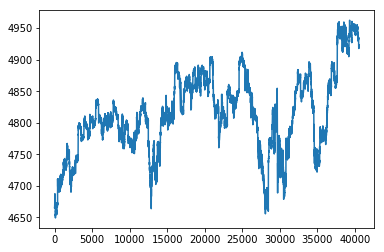

In [14]:
plt.figure()
plt.plot(df.NDX)
plt.show()

## sml100

In [31]:
import datetime

In [55]:
df1 = pd.read_csv('./data/sml100/NEW-DATA-1.T15.txt', sep=' ')
df2 = pd.read_csv('./data/sml100/NEW-DATA-2.T15.txt', sep=' ')
df = pd.concat([df1, df2], axis=0)
df = df.iloc[:, :-2]
df.columns = ['Date','Time','Temperature_Comedor_Sensor','Temperature_Habitacion_Sensor','Weather_Temperature','CO2_Comedor_Sensor','CO2_Habitacion_Sensor','Humedad_Comedor_Sensor','Humedad_Habitacion_Sensor','Lighting_Comedor_Sensor','Lighting_Habitacion_Sensor','Precipitacion','Meteo_Exterior_Crepusculo','Meteo_Exterior_Viento','Meteo_Exterior_Sol_Oest','Meteo_Exterior_Sol_Est','Meteo_Exterior_Sol_Sud','Meteo_Exterior_Piranometro','Exterior_Entalpic_1','Exterior_Entalpic_2','Exterior_Entalpic_turbo','Temperature_Exterior_Sensor','Humedad_Exterior_Sensor','Day_Of_Week']
df.reset_index(drop=True, inplace=True)

df.shape

(4137, 24)

In [56]:
df['Date'] = df.Date.apply(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y'))

In [57]:
df_date = df.groupby(['Date'], as_index=False)['Time'].agg({'Date_count':'count'})
outdate = df_date[df_date.Date_count != 96].Date.tolist()

In [58]:
df = df[~df.Date.isin(outdate)]
df.shape

(4032, 24)

In [63]:
df = df.sort_values(['Date', 'Time'])
df.reset_index(drop=True, inplace=True)

In [64]:
df.head()

,Date,Time,Temperature_Comedor_Sensor,Temperature_Habitacion_Sensor,Weather_Temperature,CO2_Comedor_Sensor,CO2_Habitacion_Sensor,Humedad_Comedor_Sensor,Humedad_Habitacion_Sensor,Lighting_Comedor_Sensor,Lighting_Habitacion_Sensor,Precipitacion,Meteo_Exterior_Crepusculo,Meteo_Exterior_Viento,Meteo_Exterior_Sol_Oest,Meteo_Exterior_Sol_Est,Meteo_Exterior_Sol_Sud,Meteo_Exterior_Piranometro,Exterior_Entalpic_1,Exterior_Entalpic_2,Exterior_Entalpic_turbo,Temperature_Exterior_Sensor,Humedad_Exterior_Sensor,Day_Of_Week
0,2012-03-14,00:00,19.3327,19.5260,10.00000,217.835,223.381,41.4320,43.1573,11.6053,13.0207,0.0,0.650,0.0,0.0,0.0,0.0,-3.25067,0,0,0,14.4433,57.5627,2.06667
1,2012-03-14,00:15,19.2380,19.3733,9.46667,219.115,223.637,41.0427,43.1600,11.6053,13.5413,0.0,0.650,0.0,0.0,0.0,0.0,-3.31600,0,0,0,14.2667,57.4720,3.00000
2,2012-03-14,00:30,19.0933,19.2087,9.00000,219.200,225.131,41.0133,43.1520,11.5240,13.1027,0.0,0.738,0.0,0.0,0.0,0.0,-3.44667,0,0,0,13.9887,57.7253,3.00000
3,2012-03-14,00:45,18.9620,19.0527,9.00000,221.493,227.509,41.1520,43.1573,11.5240,13.2653,0.0,0.650,0.0,0.0,0.0,0.0,-3.44667,0,0,0,13.7673,58.3413,3.00000
4,2012-03-14,01:00,18.8533,18.8973,9.00000,222.229,226.208,41.1520,43.2400,11.5073,12.4353,0.0,0.650,0.0,0.0,0.0,0.0,-3.18533,0,0,0,13.6213,58.4960,3.00000


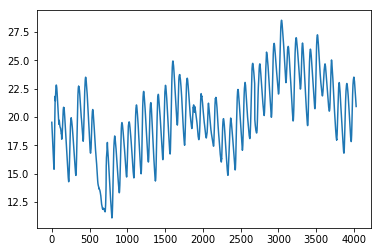

In [87]:
plt.figure()
plt.plot(df.Temperature_Habitacion_Sensor)
plt.show()